In [442]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [443]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [444]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


# Data Preparation

### Returns

In [445]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!

In [480]:
from pathlib import Path
df = pd.read_csv(
    Path("../Homework_Folder/yen.csv"), parse_dates=True, index_col="Date"
)

In [447]:
# Series using "Settle" price percentage returns
df['Return'] = returns.copy()

In [448]:
# Drop NaN values
df = df.dropna()
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return
Date,,,,,,,,,
2014-03-10,9694.0,9714.0,9671.0,9691.0,10.0,9691.0,117210.0,195505.0,0.103295
2014-03-11,9684.0,9724.0,9668.0,9718.0,27.0,9718.0,151075.0,181240.0,0.278609
2014-03-12,9710.0,9752.0,9700.0,9739.0,21.0,9739.0,179062.0,163758.0,0.216094
2014-03-13,9732.0,9849.0,9722.0,9839.0,100.0,9839.0,244724.0,127511.0,1.026799
2014-03-14,9817.0,9881.0,9815.0,9866.0,36.0,9875.0,71695.0,90408.0,0.365891


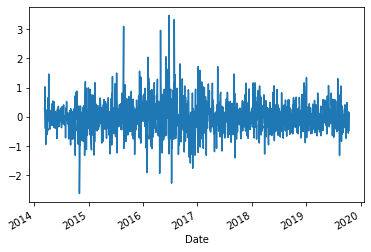

In [449]:
returns = df.Settle.pct_change() * 100
returns.plot()

### Lagged Returns 

In [450]:
# Create a lagged return using the shift function
# YOUR CODE HERE!
df['Lagged_Return'] = returns.shift()

In [451]:
df = df.dropna()
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2014-03-12,9710.0,9752.0,9700.0,9739.0,21.0,9739.0,179062.0,163758.0,0.216094,0.278609
2014-03-13,9732.0,9849.0,9722.0,9839.0,100.0,9839.0,244724.0,127511.0,1.026799,0.216094
2014-03-14,9817.0,9881.0,9815.0,9866.0,36.0,9875.0,71695.0,90408.0,0.365891,1.026799
2014-03-17,9867.0,9878.0,9821.0,9842.0,44.0,9835.0,106634.0,158315.0,-0.405063,0.365891
2014-03-18,9828.0,9881.0,9814.0,9855.0,20.0,9855.0,130504.0,156809.0,0.203355,-0.405063


### Train Test Split

In [452]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures[:'2017']
test = yen_futures['2018':]

In [453]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!

In [454]:
train = df.loc['2008':'2012']

In [455]:
X_train = train[["Lagged_Return"]]

In [456]:
y_train = train = train["Return"]

In [457]:
test = df.loc['2018']

In [458]:
X_test = test[["Lagged_Return"]]

In [459]:
y_test = test["Return"]

# Linear Regression Model

In [460]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
# YOUR CODE HERE!

In [461]:
# Set y as the `Return` column
y = df['Return']

In [462]:
# Select the `Lagged_Return` as a DataFrame
X = df['Lagged_Return'].to_frame()
X.head()

,Lagged_Return
Date,
2014-03-12,0.278609
2014-03-13,0.216094
2014-03-14,1.026799
2014-03-17,0.365891
2014-03-18,-0.405063


In [463]:
# Access the weekofyear attribute from the index
# Create a new column with this called `Week_of_year`
X['Week_of_year'] = X.index.weekofyear
X.head()

,Lagged_Return,Week_of_year
Date,,
2014-03-12,0.278609,11
2014-03-13,0.216094,11
2014-03-14,1.026799,11
2014-03-17,0.365891,12
2014-03-18,-0.405063,12


In [464]:
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_year'])
X_binary_encoded.head()

,Lagged_Return,Week_of_year_1,Week_of_year_2,Week_of_year_3,Week_of_year_4,Week_of_year_5,Week_of_year_6,Week_of_year_7,Week_of_year_8,Week_of_year_9,...,Week_of_year_44,Week_of_year_45,Week_of_year_46,Week_of_year_47,Week_of_year_48,Week_of_year_49,Week_of_year_50,Week_of_year_51,Week_of_year_52,Week_of_year_53
Date,,,,,,,,,,,,,,,,,,,,,
2014-03-12,0.278609,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-03-13,0.216094,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-03-14,1.026799,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-03-17,0.365891,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-03-18,-0.405063,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [465]:
y

Date
2014-03-12    0.216094
2014-03-13    1.026799
2014-03-14    0.365891
2014-03-17   -0.405063
2014-03-18    0.203355
                ...   
2019-10-09   -0.410601
2019-10-10   -0.369458
2019-10-11   -0.564304
2019-10-14    0.151335
2019-10-15   -0.469509
Name: Return, Length: 1400, dtype: float64

In [466]:
# Create a Linear Regression model and fit it to the data
model = LinearRegression()
model.fit(X_binary_encoded, y)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [467]:
# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_binary_encoded)
predictions[:10]

array([ 0.19555664,  0.19848633,  0.16101074,  0.14562988,  0.18139648,
        0.15319824,  0.20678711,  0.16113281, -0.06945801, -0.05761719])

In [468]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()

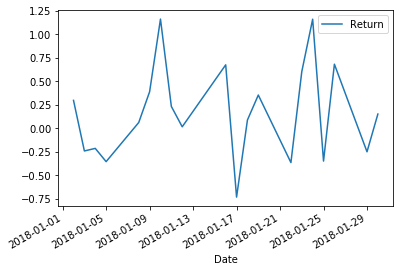

In [469]:
# Plot the first 20 predictions vs the true values
Results[:20].plot()

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [470]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# Calculate r2_score (r-squared)
r2 = r2_score(y, predictions)
print(f"r2: {r2}")
mse = mean_squared_error(y, predictions)
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)

r2: 0.04861085006741439


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [471]:
# Construct a DataFrame using just the "y" training data:
in_sample_results = y_train.to_frame()

In [472]:
X_binary_encoded

,Lagged_Return,Week_of_year_1,Week_of_year_2,Week_of_year_3,Week_of_year_4,Week_of_year_5,Week_of_year_6,Week_of_year_7,Week_of_year_8,Week_of_year_9,...,Week_of_year_44,Week_of_year_45,Week_of_year_46,Week_of_year_47,Week_of_year_48,Week_of_year_49,Week_of_year_50,Week_of_year_51,Week_of_year_52,Week_of_year_53
Date,,,,,,,,,,,,,,,,,,,,,
2014-03-12,0.278609,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-03-13,0.216094,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-03-14,1.026799,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-03-17,0.365891,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-03-18,-0.405063,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-09,0.170931,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-10-10,-0.410601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-10-11,-0.369458,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [473]:
in_sample_results["In-sample Predictions"] = model.predict(X_binary_encoded)

In [474]:
in_sample_results

,Return,In-sample Predictions
0,NaN,0.195557
1,NaN,0.198486
2,NaN,0.161011
3,NaN,0.145630
4,NaN,0.181396
...,...,...
1395,NaN,0.030640
1396,NaN,0.057617
1397,NaN,0.055664
1398,NaN,0.018188


In [ ]:
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

In [477]:
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)

NameError: name 'in_sample_mse' is not defined

# Conclusions